# s20250319 - redo some of yesteday's stuff

The 200 and 300 seriues yesterday were too short, redo these.

In [1]:


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn
FutureWarning = warn
def reset_scope(scope):
    try:
        scope.read()
    except:
        pass



import sys
sys.path.append('/home/stephane/pythonlib/selfmixing/')
import warnings
warnings.filterwarnings('ignore')
from loadmefirst import *
import selfmixing as sm
from scipy.signal import savgol_filter
import time

from IPython.display import Image 

import sys
sys.path.append('/home/stephane/pythonlib/instruments/rtb2004')
sys.path.append('/home/stephane/pythonlib/instruments/sounddriver')
sys.path.append('/home/stephane/pythonlib/instruments/waverunner')
sys.path.append('/home/stephane/pythonlib/instruments/hp33500')

import rtb
import hp33500
import LeCroy_novxi_py3 as lc
from importlib import reload
#import sounddriver as sd
from numpy import *
from scipy import signal
from numpy import random
import pickle
from matplotlib.pyplot import *
from threading import Thread, Event
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

2025-03-19 13:32:08.408109: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 13:32:08.411598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 13:32:08.463618: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-19 13:32:09.461197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%matplotlib notebook

In [3]:


reload(sm)
reload(rtb)
scope = rtb.RTB('benin.lab21')
x,y=scope.get_channels([1,3])



Rohde&Schwarz,RTB2004,1333.1005k04/203742,02.400


In [4]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')

In [28]:
fg = hp33500.hp33500('zaire.lab21')

<IPython.core.display.Javascript object>


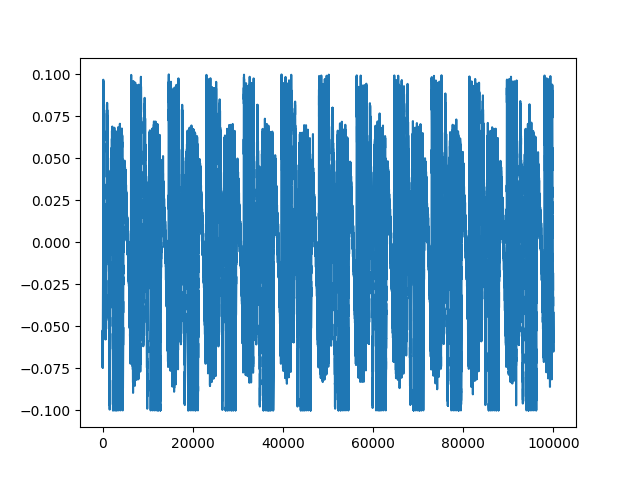

/home/stephane/VirtualEnvs/tensorflow/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


In [5]:
figure()
plot(rtb.scaledata(x[0]))

In [6]:
len(rtb.scaledata(x[0]))

99999

In [8]:
x[0]['settings'].splitlines()

['HEAD:-1.200000E-01,1.199976E-01,100000,1',
 'YRES:16',
 'YOR:-9.999847412E-02',
 'YINC:3.051757813E-06',
 'XOR:-1.200000000E-01',
 'XINC:2.400000000E-06',
 'FORM:UINT,16']

In [9]:
1/2.4e-6

416666.6666666667

<IPython.core.display.Javascript object>


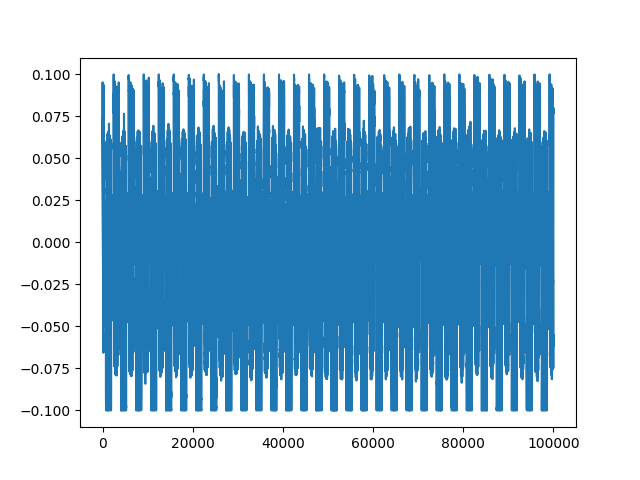

In [12]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
figure()
plot(rtb.scaledata(x[0]))

<IPython.core.display.Javascript object>


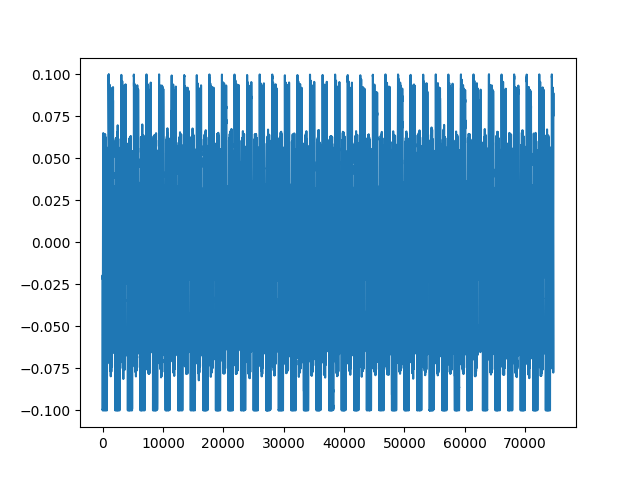

In [13]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
figure()
plot(rtb.scaledata(x[0]))

In [14]:
x[0]['settings'].splitlines()

['HEAD:-6.000000E-01,1.670592E-01,79903,1',
 'YRES:16',
 'YOR:-9.999847412E-02',
 'YINC:3.051757813E-06',
 'XOR:-6.000000000E-01',
 'XINC:9.600000000E-06',
 'FORM:UINT,16']

In [15]:
len(rtb.scaledata(x[0]))

74692

In [16]:
len(x[0]['data'])

149386

In [17]:
74692/256

291.765625

<IPython.core.display.Javascript object>


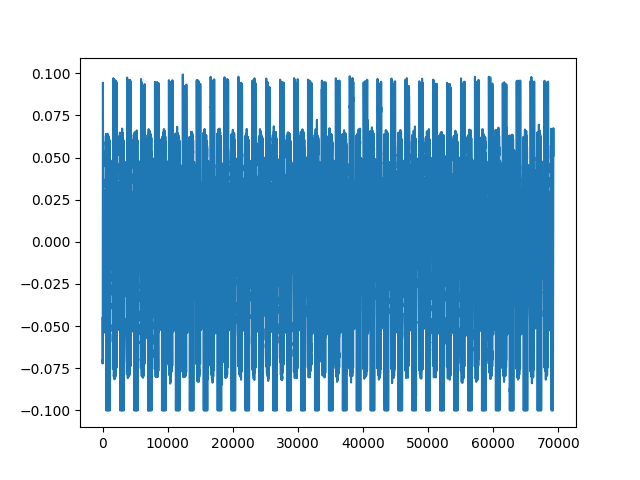

In [18]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
figure()
plot(rtb.scaledata(x[0]))

In [19]:
x[0]['settings'].splitlines()

['HEAD:-5.9997600E-01,9.4245840E-02,74170,1',
 'YRES:16',
 'YOR:-9.999847412E-02',
 'YINC:3.051757813E-06',
 'XOR:-5.999760000E-01',
 'XINC:9.360000000E-06',
 'FORM:UINT,16']

<IPython.core.display.Javascript object>


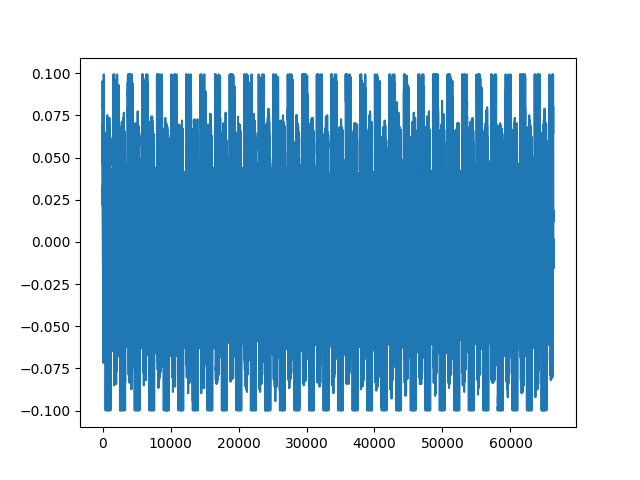

In [20]:
x=scope.get_channels([1,2,3,4], nbytes=1, fname='bla')
figure()
plot(rtb.scaledata(x[0]))

In [21]:
x[0]['settings'].splitlines()

['HEAD:-5.9997600E-01,2.0807280E-02,66324,1',
 'YRES:10',
 'YOR:-9.990234375E-02',
 'YINC:7.812500000E-04',
 'XOR:-5.999760000E-01',
 'XINC:9.360000000E-06',
 'FORM:UINT,8']

<IPython.core.display.Javascript object>


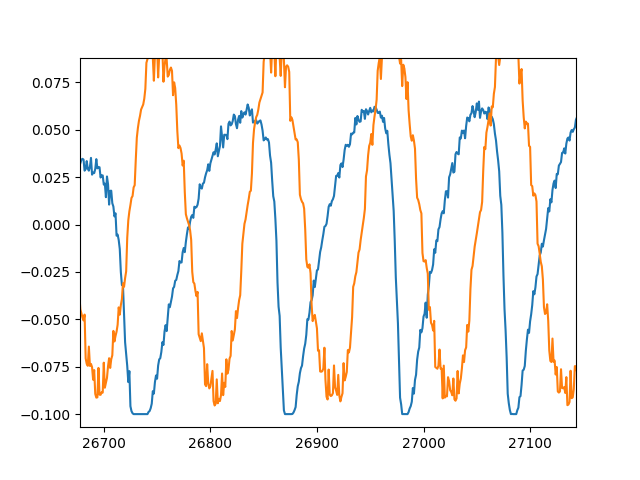

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-9.999847412E-02',
 'YINC:3.051757813E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [23]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
figure()
plot(rtb.scaledata(x[0]))
x[0]['settings'].splitlines()

In [24]:
131000/256

511.71875

In [25]:
plot(rtb.scaledata(x[1]))
x[1]['settings'].splitlines()

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-9.999847412E-02',
 'YINC:3.051757813E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

<IPython.core.display.Javascript object>


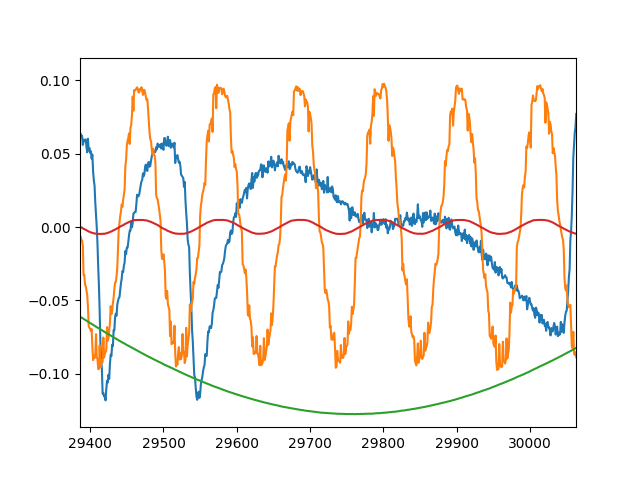

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-2.599961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [26]:
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()

In [29]:


file_index=200
for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250319_{file_index:03d}'
    x,y,z,t=scope.get_channels([1,2,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")



s20250319_200 10
s20250319_201 20
s20250319_202 30
s20250319_203 40
s20250319_204 50
s20250319_205 60
s20250319_206 70
s20250319_207 80
s20250319_208 90
s20250319_209 100


For this series the amplitude of displacement is 100mV, which is too small probably.

<IPython.core.display.Javascript object>


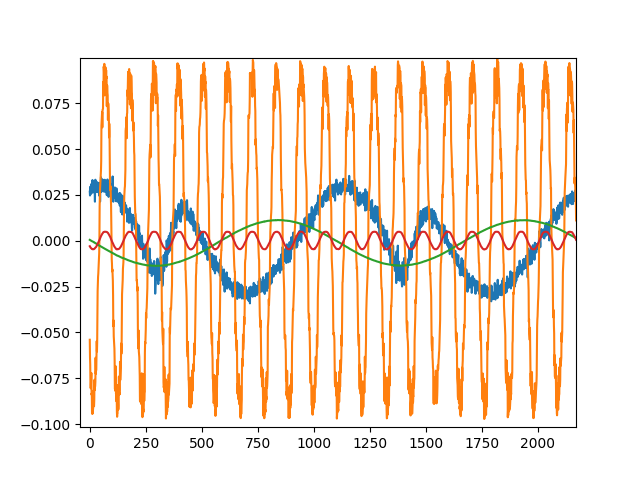

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-2.599961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [32]:
scope.acq_state("SINGLE")
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
scope.acq_state("RUN")
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()

<IPython.core.display.Javascript object>


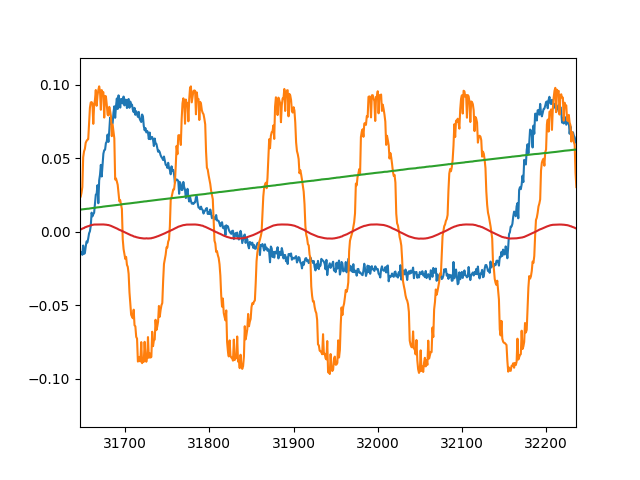

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-2.599961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [33]:
scope.acq_state("SINGLE")
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
scope.acq_state("RUN")
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()

# Redo it with larger displacement

In [34]:
file_index = 300
for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250319_{file_index:03d}'
    x,y,z,t=scope.get_channels([1,2,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")


s20250319_300 10
s20250319_301 20
s20250319_302 30
s20250319_303 40
s20250319_304 50
s20250319_305 60
s20250319_306 70
s20250319_307 80
s20250319_308 90
s20250319_309 100


For this series the amplitue of displacement is 1V. The blue laesr is modulated by 1kHz 5mV signal. ITs DC current is 29.25mA. The IR laser is my 1310nm, driven at -7.6mA. 

# Now take a test seires with freq modulatoin of displacement

<IPython.core.display.Javascript object>


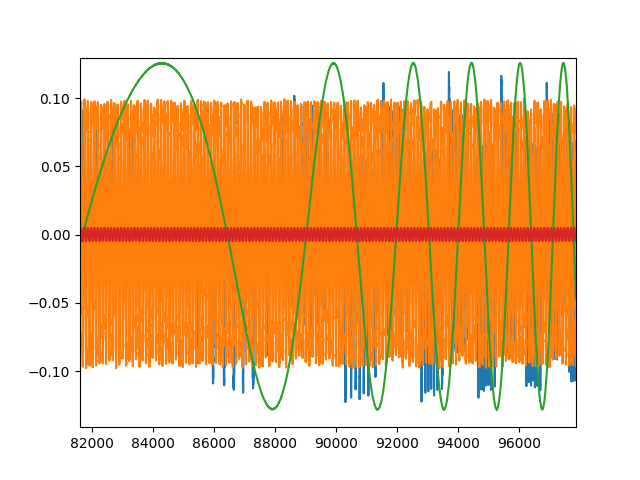

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-2.599961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [36]:
file_index=320
scope.acq_state("SINGLE")
x=scope.get_channels([1,2,3,4], nbytes=2, fname=f's20250319_{file_index:03d}')
scope.acq_state("RUN")
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()

This one is taken as a test set with freq modulation std 40HZ centered at 50, and mod freq 3Hz. Amplitude dispalcement 1V.

# Now again two modalities but without modulatoin of green

This one is taken with 1V amplityde of displacemnet. Blue laser is not modulated, DC values as above 29.25 for the blue laser -7.6 for my 1310.

In [38]:
file_index=400

for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250319_{file_index:03d}'
    x,y,z,t=scope.get_channels([1,2,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")


s20250319_400 10
s20250319_401 20
s20250319_402 30
s20250319_403 40
s20250319_404 50
s20250319_405 60
s20250319_406 70
s20250319_407 80
s20250319_408 90
s20250319_409 100


<IPython.core.display.Javascript object>


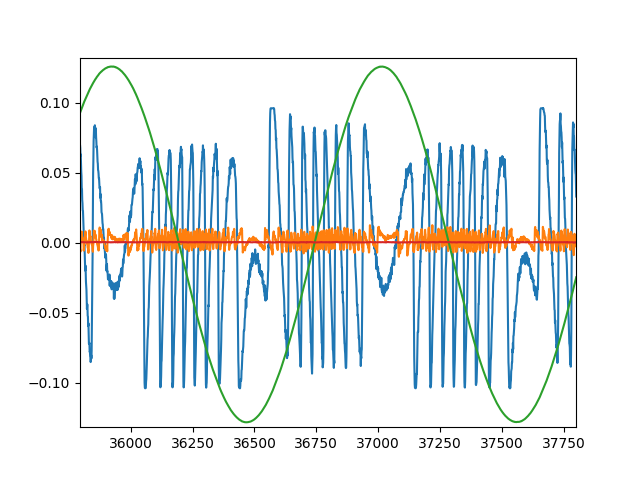

/home/stephane/VirtualEnvs/tensorflow/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-1.039984741E-01',
 'YINC:3.051757813E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [39]:
scope.acq_state("SINGLE")
x=scope.get_channels([1,2,3,4], nbytes=2, fname='bla')
scope.acq_state("RUN")
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()

The one below is a test series with frequency modulation of the displacement, same parameters as above.

<IPython.core.display.Javascript object>


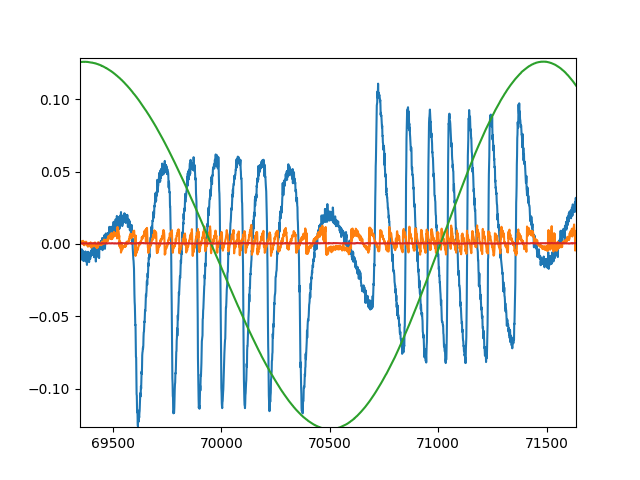

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-2.599961853E-01',
 'YINC:7.629394531E-06',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']

In [40]:
file_index=420
scope.acq_state("SINGLE")
x=scope.get_channels([1,2,3,4], nbytes=2, fname=f's20250319_{file_index:03d}')
scope.acq_state("RUN")
figure()
for i in range(4):
    plot(rtb.scaledata(x[i]))
x[0]['settings'].splitlines()